<a href="https://colab.research.google.com/github/PeixotoJr/APD/blob/main/Previsao_ST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importação Biblíotecas
Essas bibliotecas são essenciais para manipulação de dados (pandas, numpy), visualização (matplotlib, seaborn), download de dados financeiros (yfinance), análise de séries temporais (statsmodels) e previsões de séries temporais (Prophet).

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import yfinance as yf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.seasonal import seasonal_decompose
from prophet import Prophet

## A lista symbols contém os símbolos de ações que serão analisadas. dias_previsao define o número de dias para os quais as previsões serão feitas usando o Prophet.

In [ ]:
# Definindo os símbolos das ações
symbols = ['AAPL', 'MSFT', 'GOOGL', 'AMZN','TSLA', 'NVDA', 'NFLX', 'JNJ']
dias_previsao = 45

# Download de Dados Históricos de Preços de Ações
## Usa a biblioteca yfinance para baixar os preços de fechamento ajustados de cada ação desde 1º de janeiro de 2020 até 10 de setembro de 2024. O método dropna() remove valores nulos.

In [ ]:
# Baixando dados históricos de preços para cada ação
data_dict = {}
for symbol in symbols:
    data = yf.download(symbol, start='2020-01-01', end='2024-09-10')['Adj Close']
    # Verificar se há dados e remover valores nulos
    data = data.dropna()

    # Verifique se a série tem dados suficientes para plotar ACF/PACF (pelo menos 30 pontos)
    if len(data) >= 30:
        data_dict[symbol] = data
        print(f'Dados de {symbol} carregados com sucesso! ({len(data)} pontos)')
    else:
        print(f'Dados de {symbol} insuficientes para análise. Apenas {len(data)} pontos encontrados.')

[*********************100%***********************]  1 of 1 completed


Dados de AAPL carregados com sucesso! (1179 pontos)


[*********************100%***********************]  1 of 1 completed


Dados de MSFT carregados com sucesso! (1179 pontos)


[*********************100%***********************]  1 of 1 completed


Dados de GOOGL carregados com sucesso! (1179 pontos)


[*********************100%***********************]  1 of 1 completed


Dados de AMZN carregados com sucesso! (1179 pontos)


[*********************100%***********************]  1 of 1 completed


Dados de TSLA carregados com sucesso! (1179 pontos)


[*********************100%***********************]  1 of 1 completed


Dados de NVDA carregados com sucesso! (1179 pontos)


[*********************100%***********************]  1 of 1 completed


Dados de NFLX carregados com sucesso! (1179 pontos)


[*********************100%***********************]  1 of 1 completed

Dados de JNJ carregados com sucesso! (1179 pontos)


# Plotagem das Séries Temporais

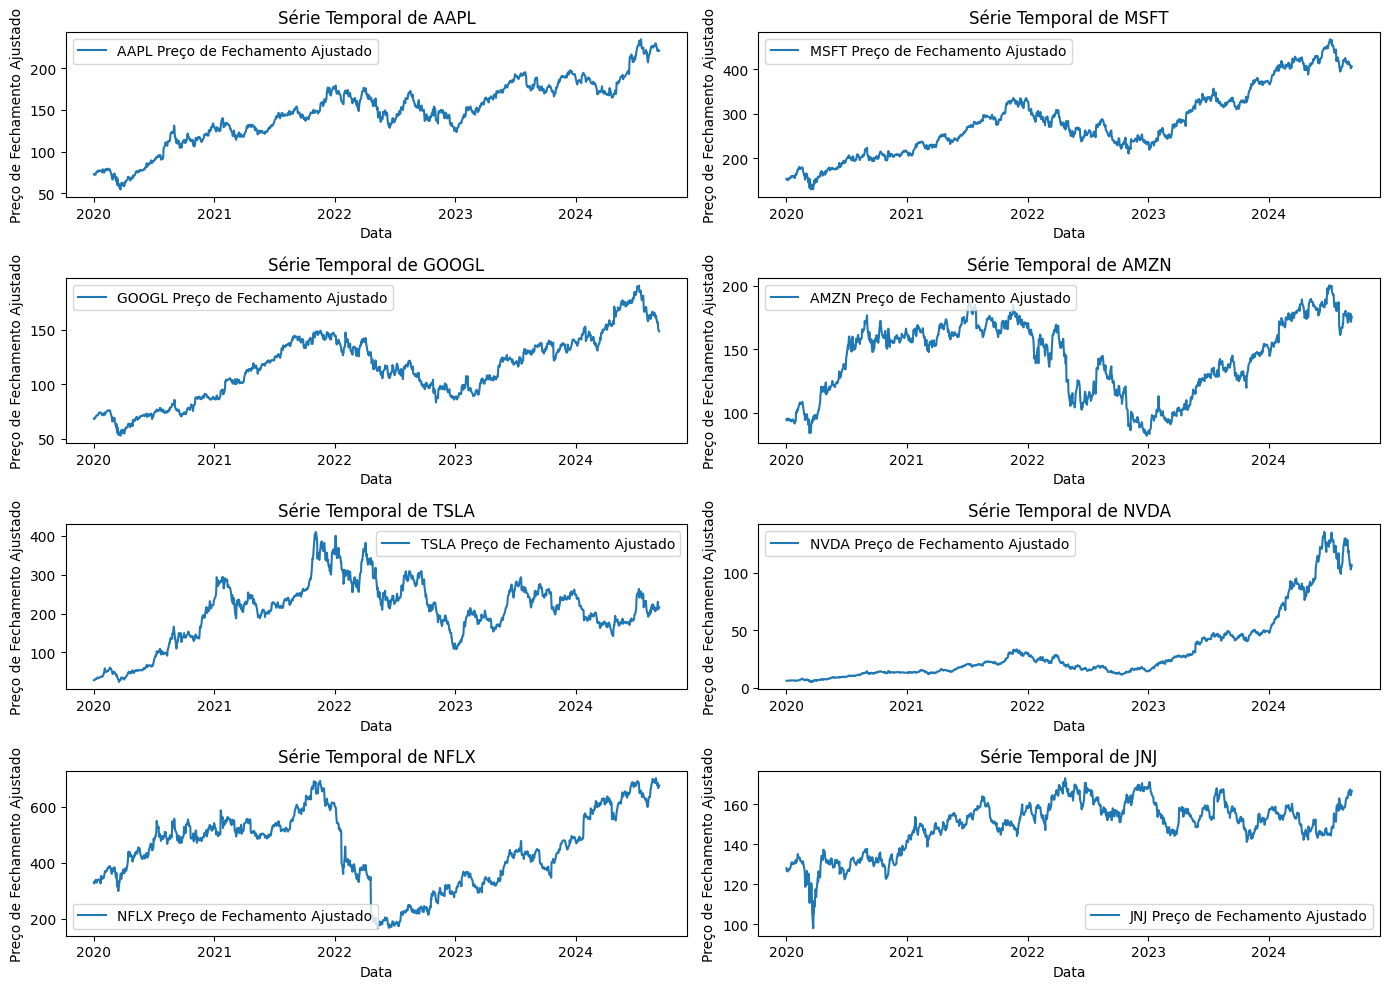

In [ ]:
# Verificar se há dados suficientes em cada ação antes de plotar
fig, axes = plt.subplots(4, 2, figsize=(14, 10))

for i, (symbol, ax) in enumerate(zip(data_dict.keys(), axes.flatten())):
    ax.plot(data_dict[symbol], label=f'{symbol} Preço de Fechamento Ajustado')
    ax.set_title(f'Série Temporal de {symbol}')
    ax.set_xlabel('Data')
    ax.set_ylabel('Preço de Fechamento Ajustado')
    ax.legend()

plt.tight_layout()
plt.show()

# Decomposição Sazonal das Séries Temporais

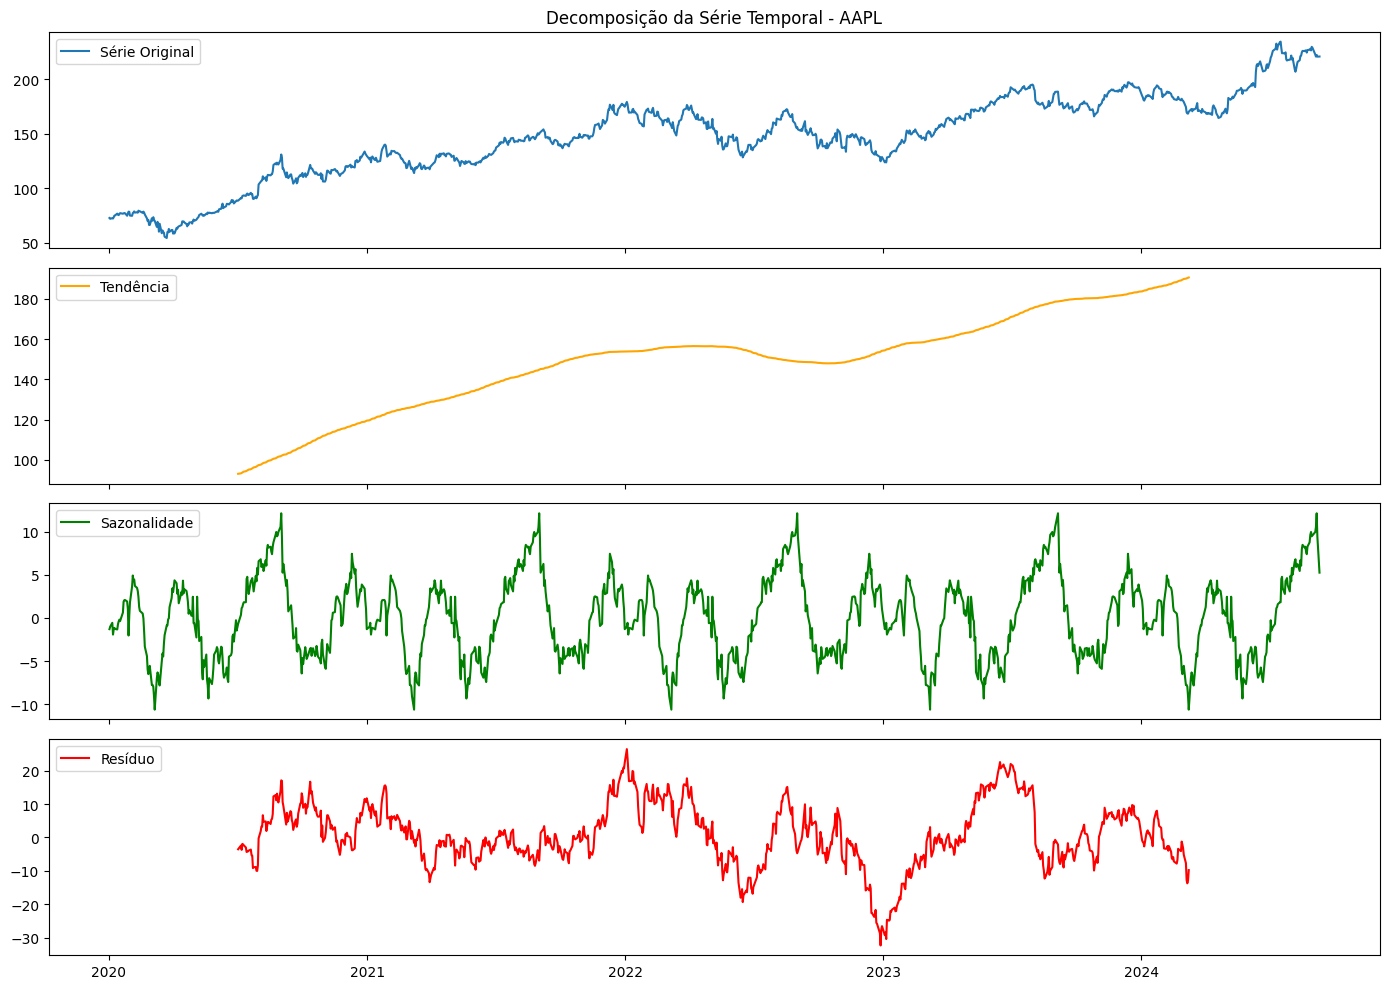

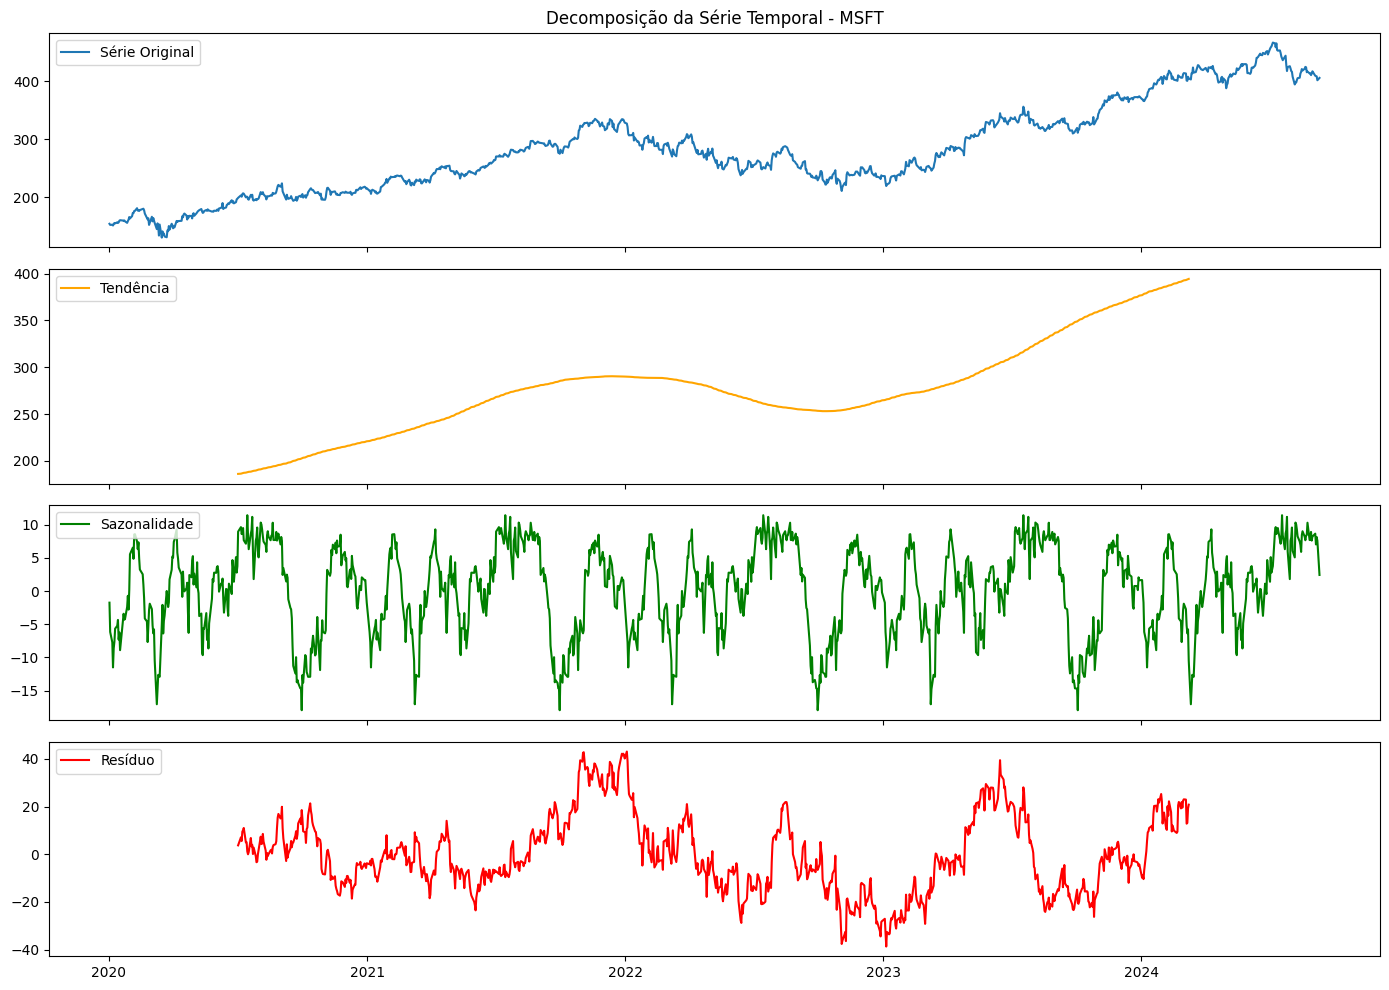

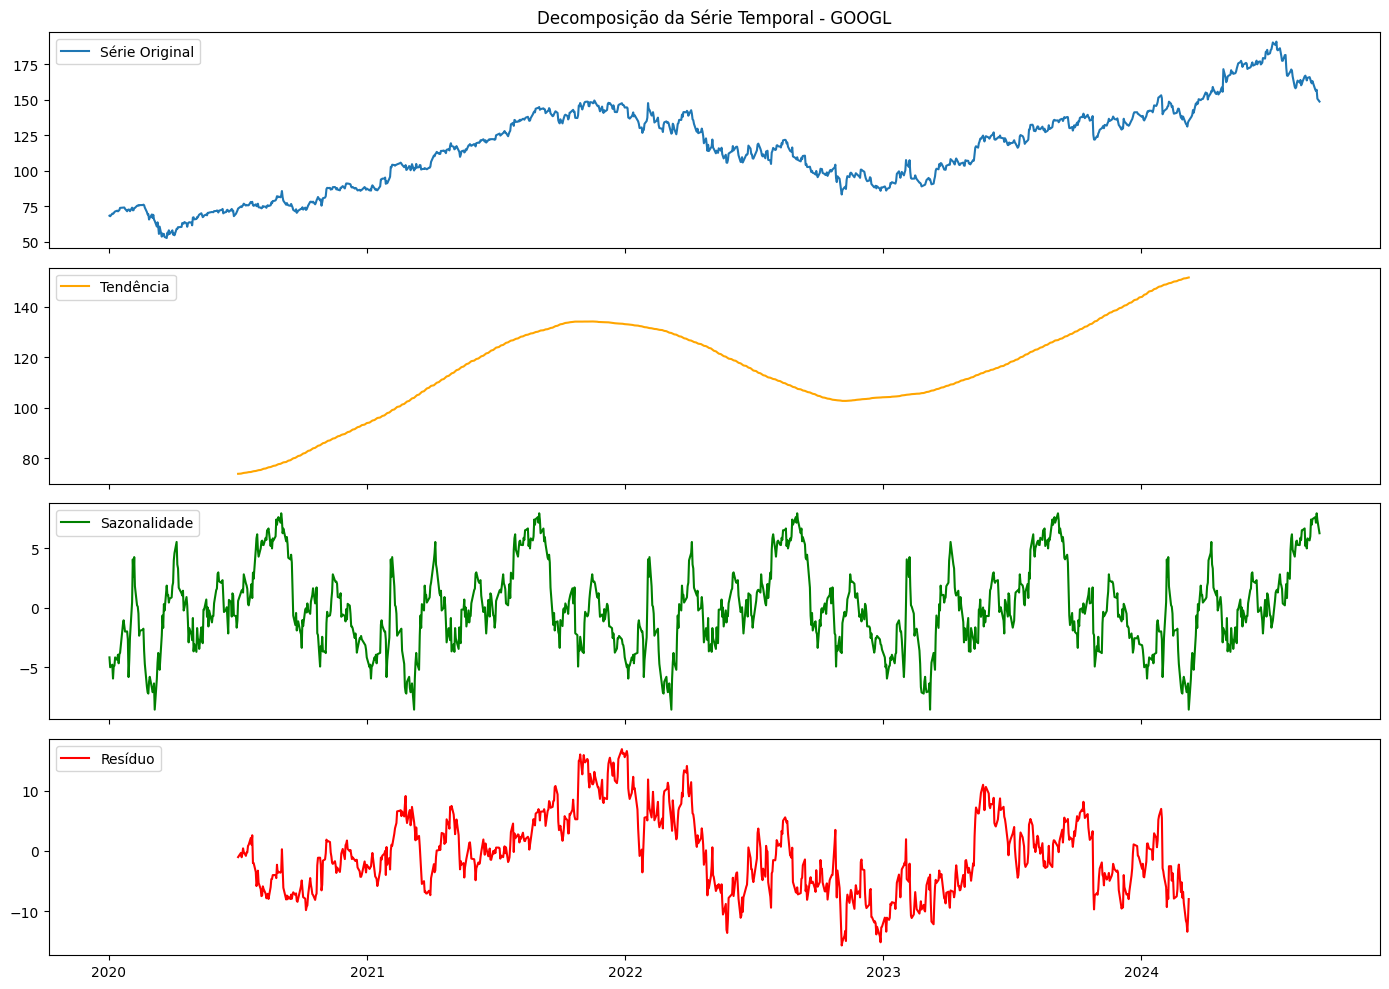

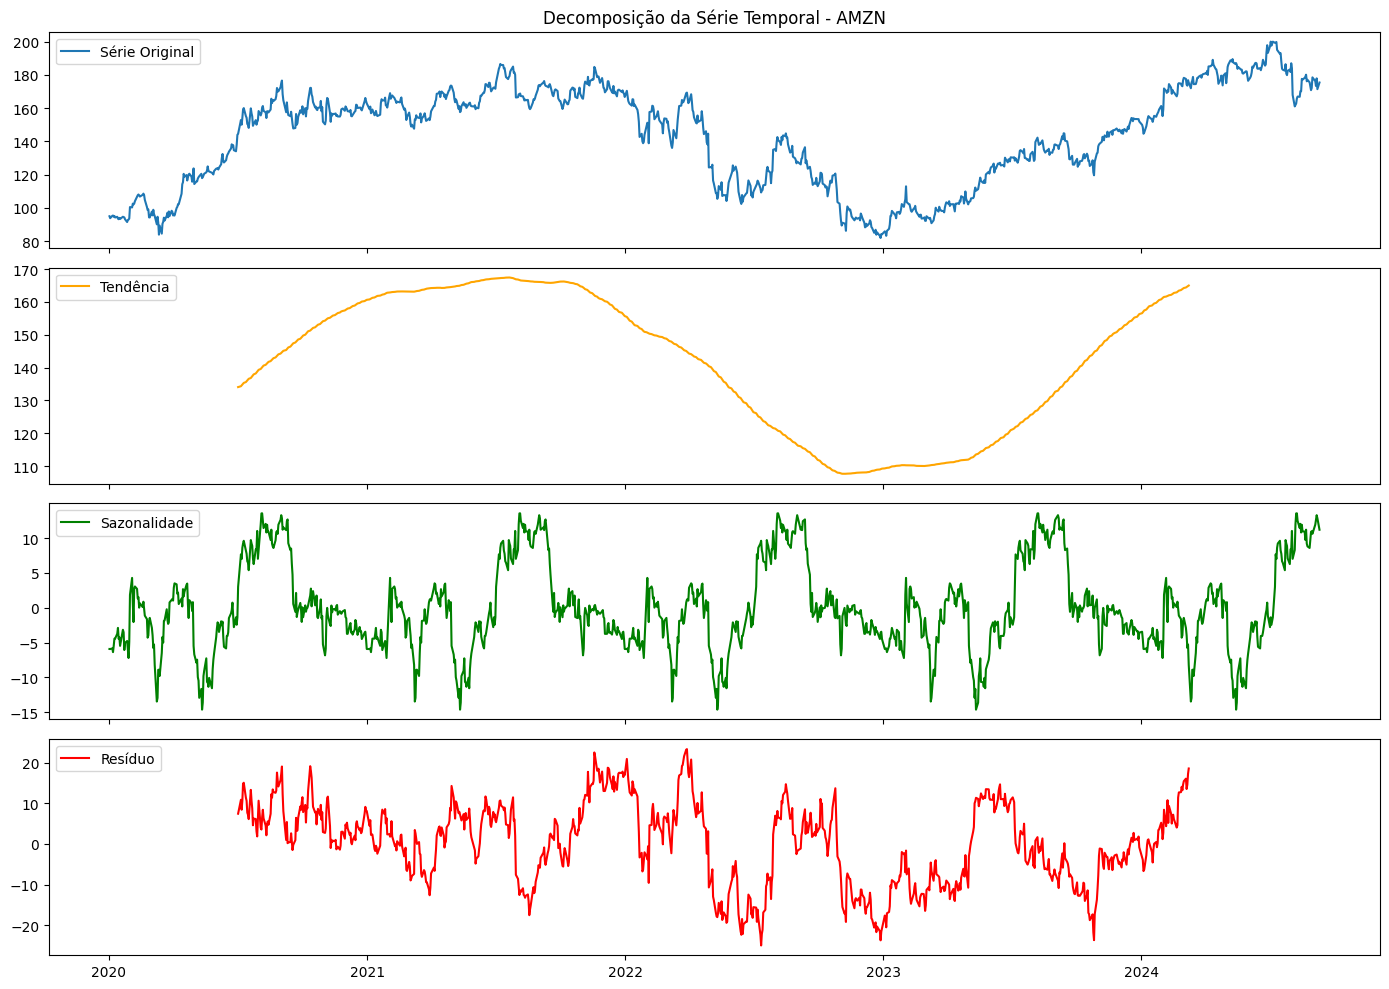

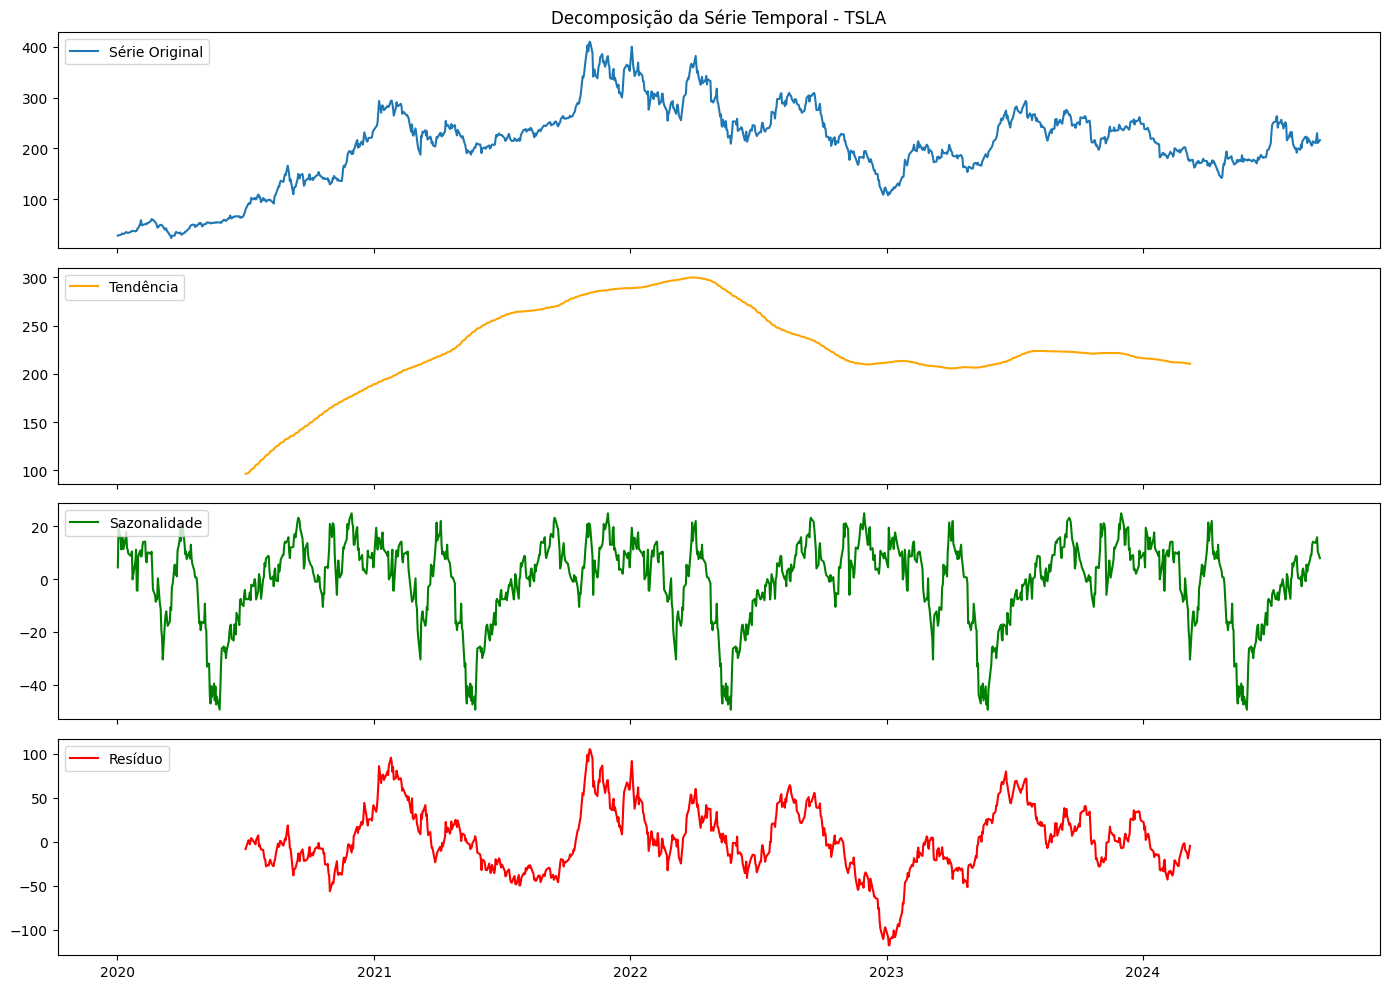

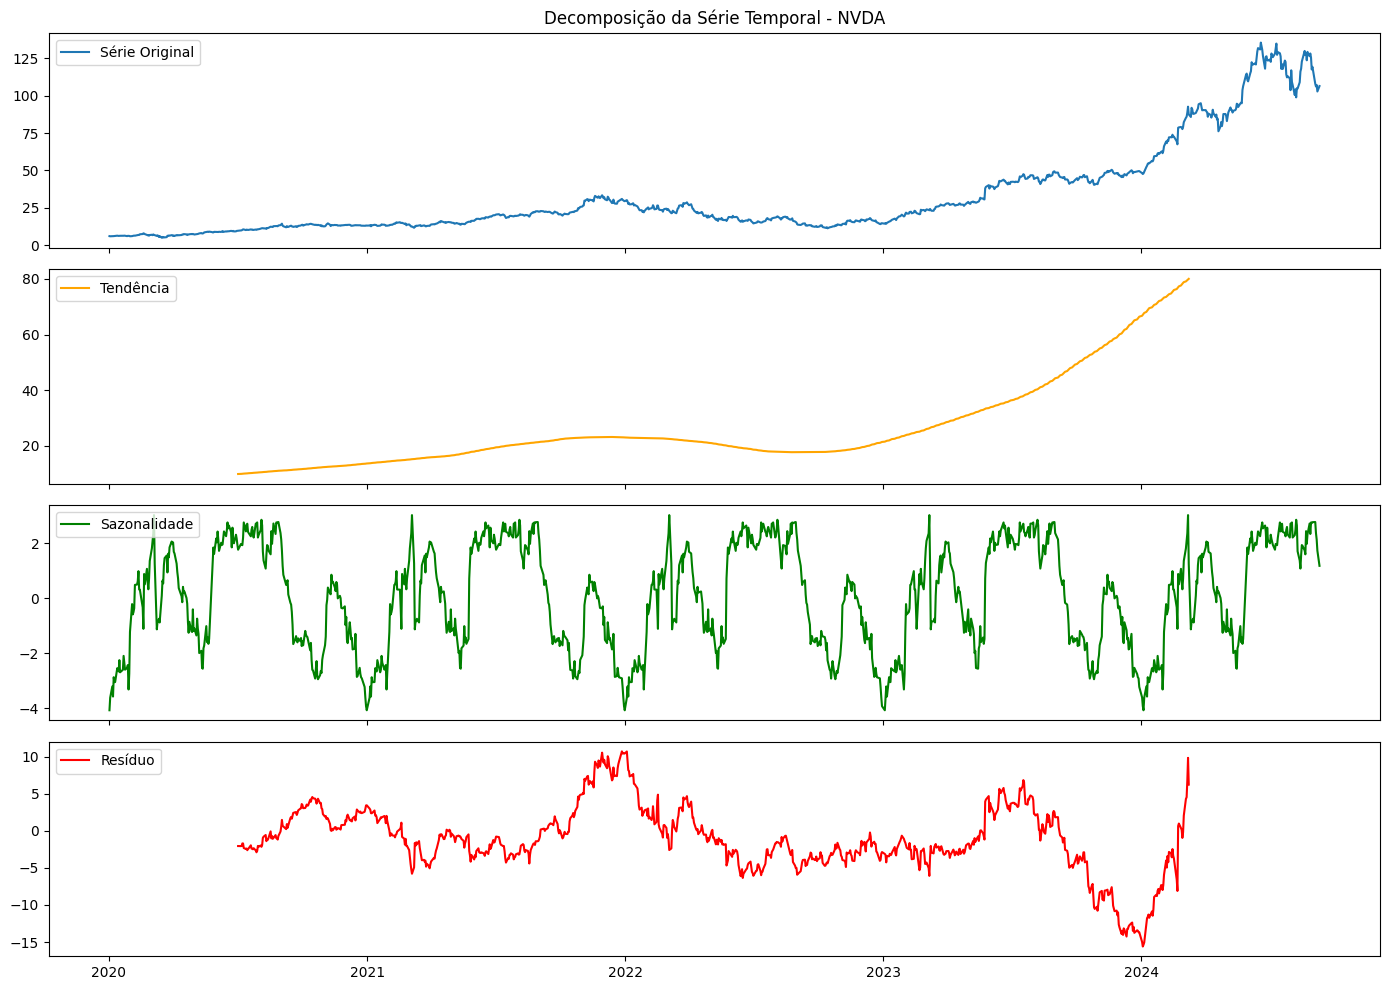

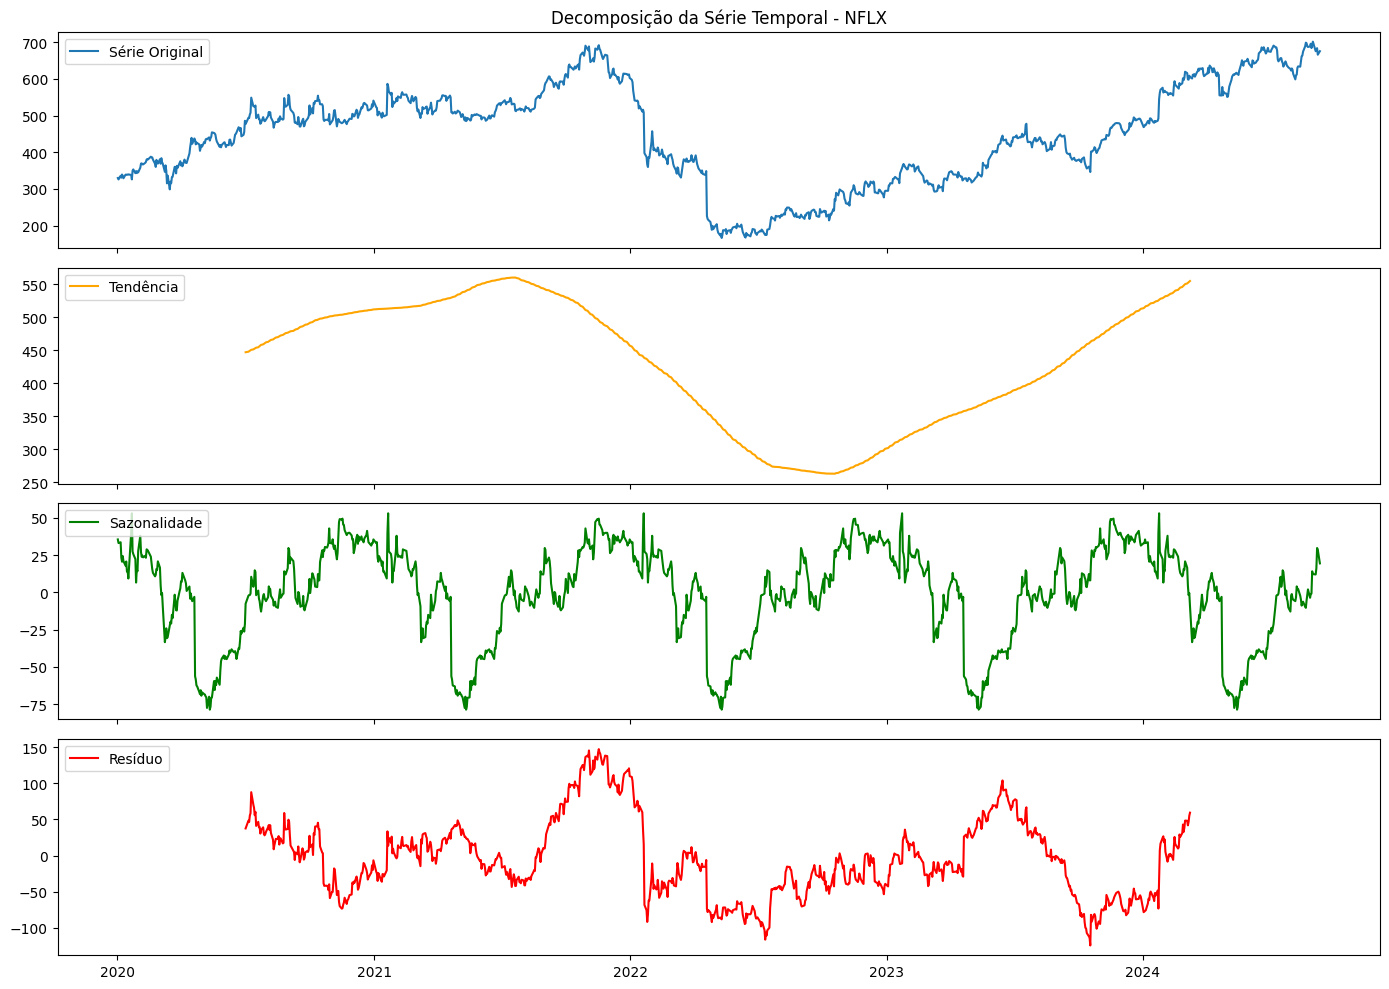

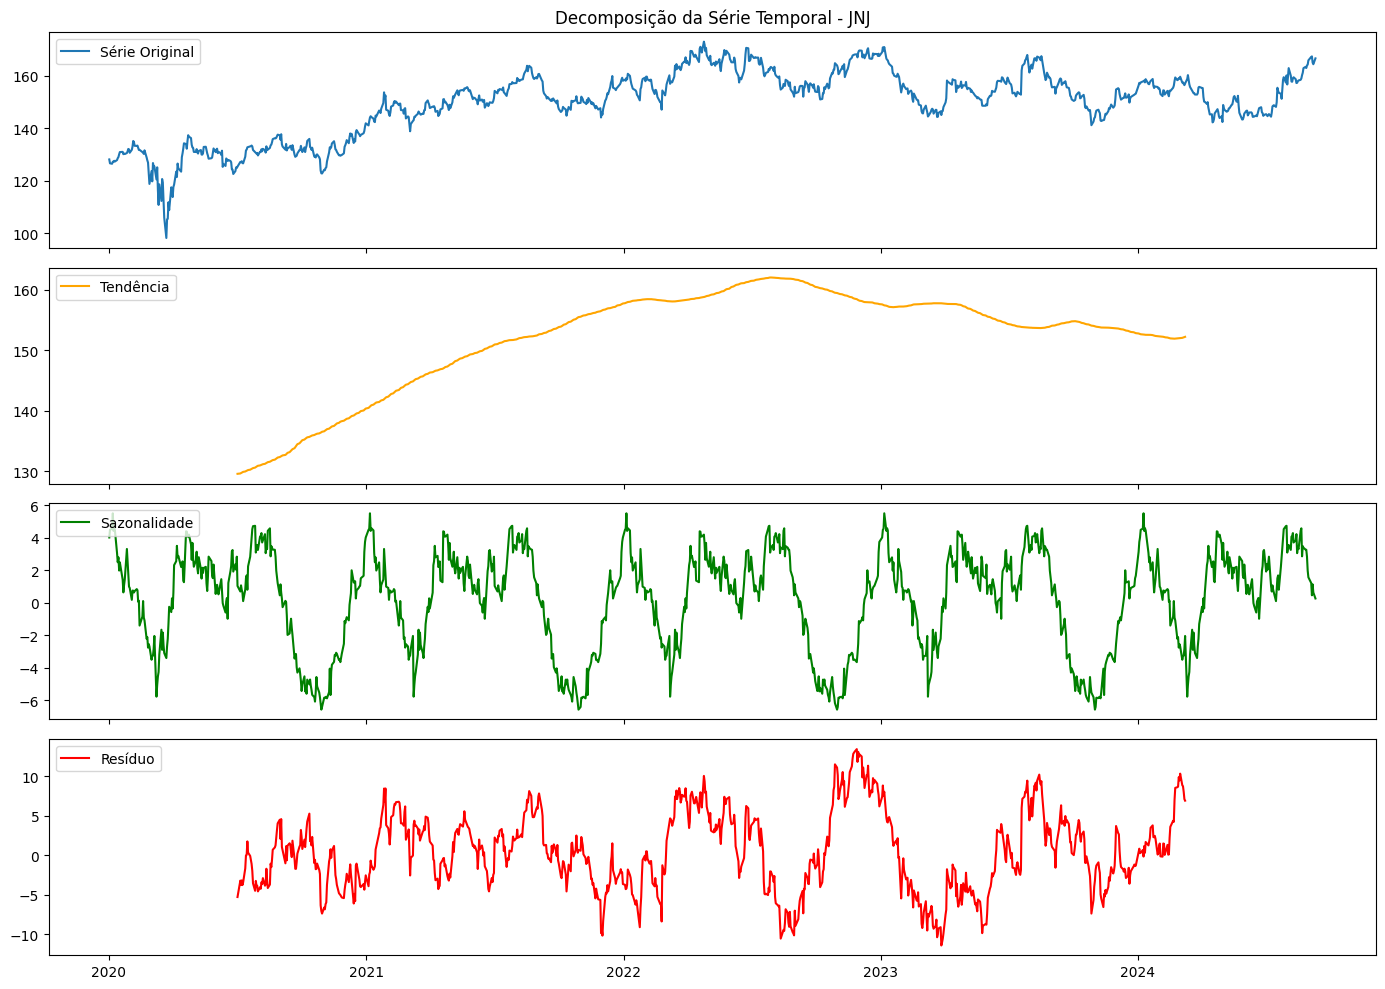

In [ ]:
for symbol, data in data_dict.items():
    # Decomposição usando o modelo aditivo
    decomposition = seasonal_decompose(data, model='additive', period=252)  # Usando 252 como período para dados diários (aproximadamente 1 ano de negociação)

    # Plotando a decomposição
    fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize=(14, 10), sharex=True)

    # Série Original
    ax1.plot(data, label='Série Original')
    ax1.legend(loc='upper left')
    ax1.set_title(f'Decomposição da Série Temporal - {symbol}')

    # Tendência
    ax2.plot(decomposition.trend, label='Tendência', color='orange')
    ax2.legend(loc='upper left')

    # Sazonalidade
    ax3.plot(decomposition.seasonal, label='Sazonalidade', color='green')
    ax3.legend(loc='upper left')

    # Resíduo
    ax4.plot(decomposition.resid, label='Resíduo', color='red')
    ax4.legend(loc='upper left')

    plt.tight_layout()
    plt.show()

# Plotagem de ACF e PACF

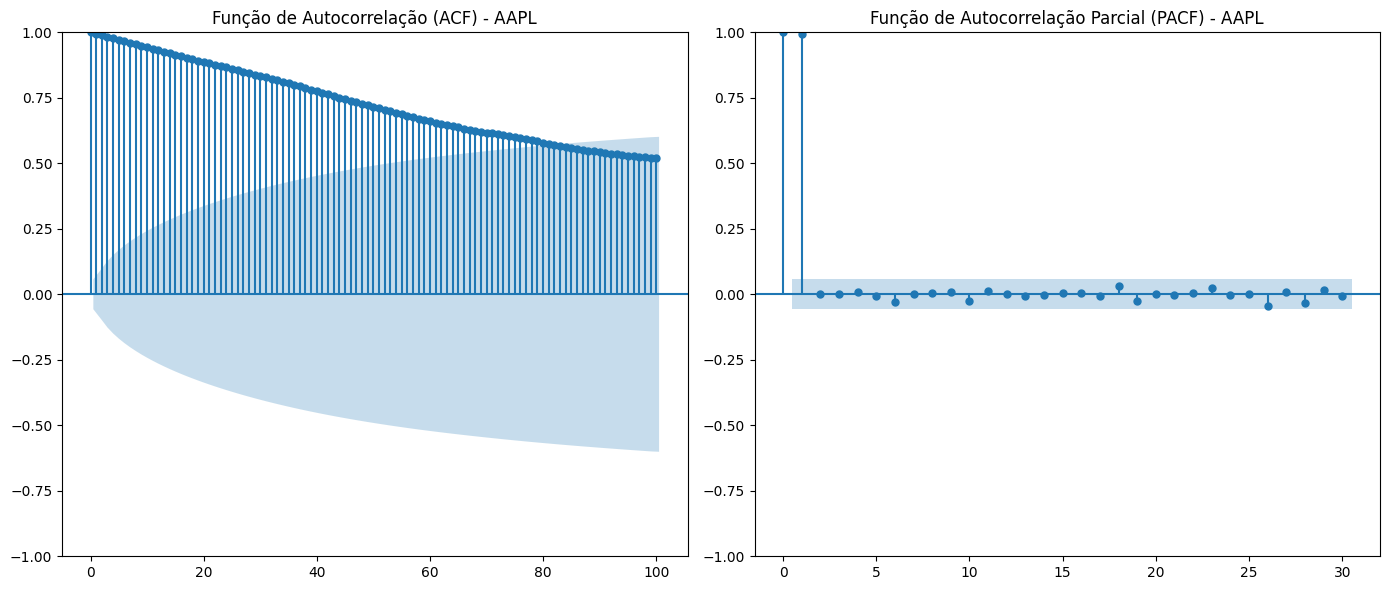

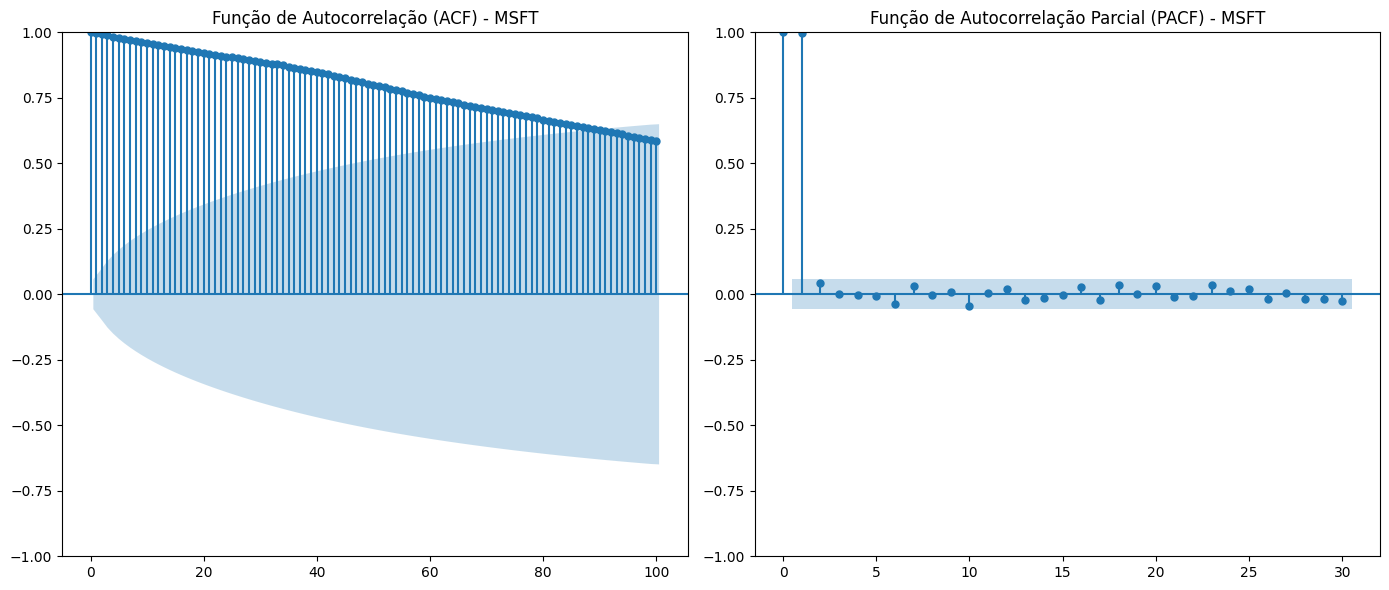

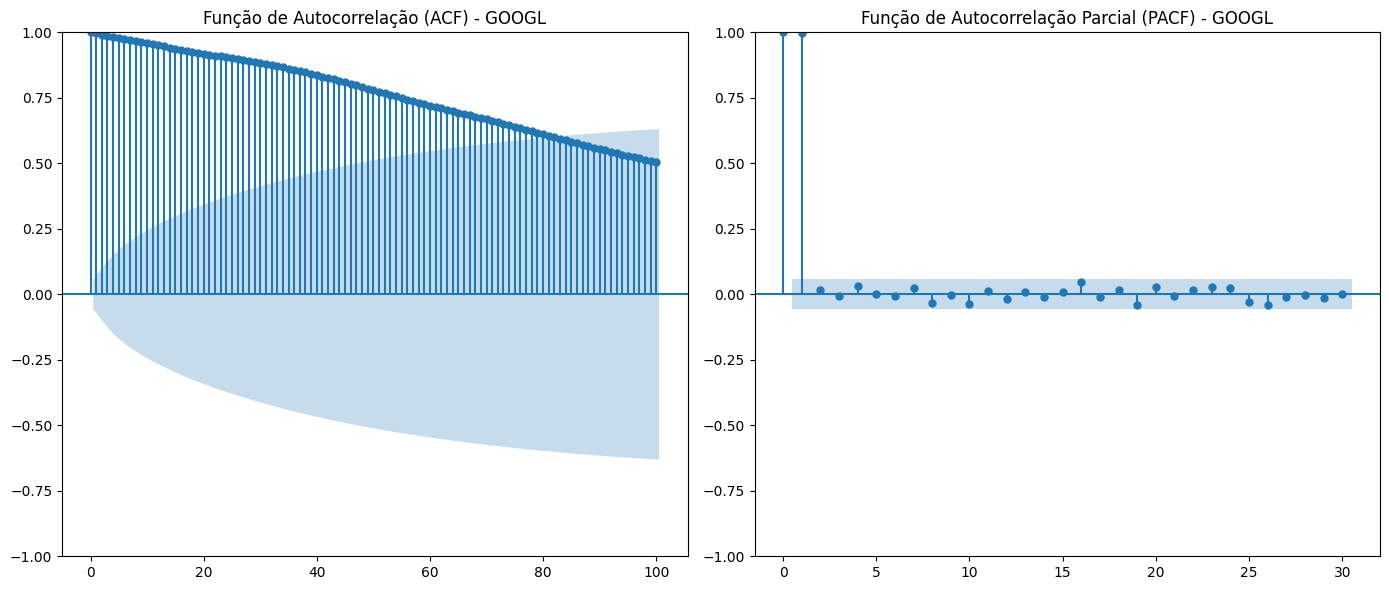

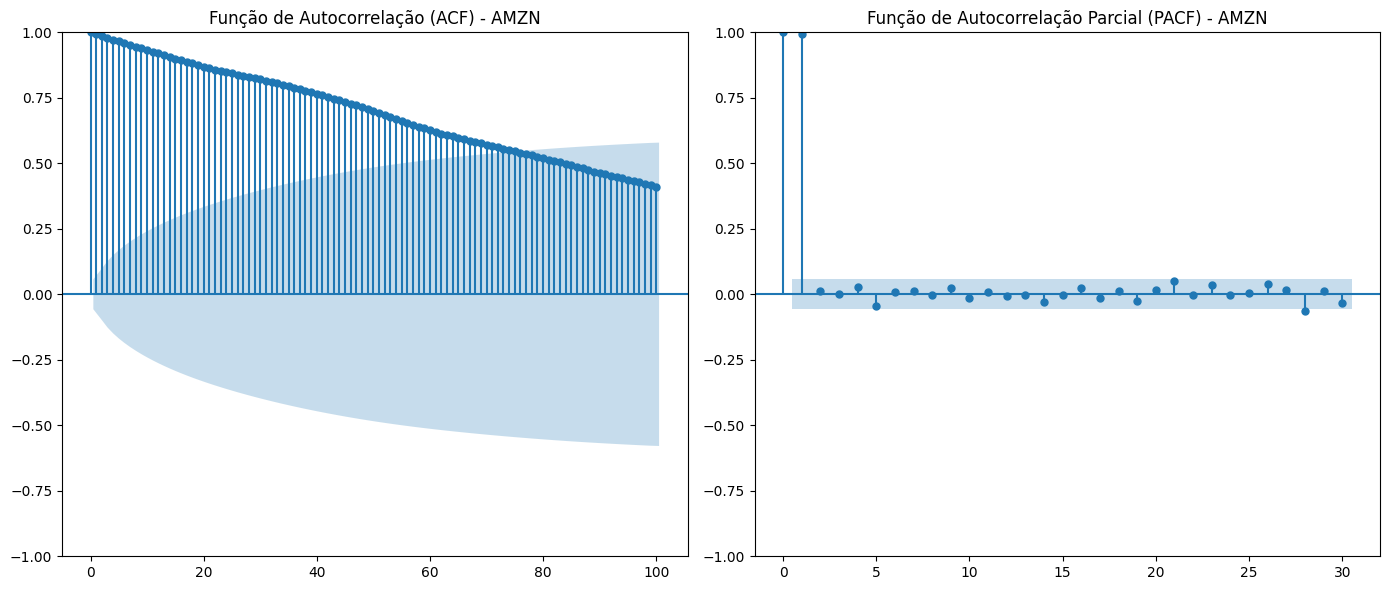

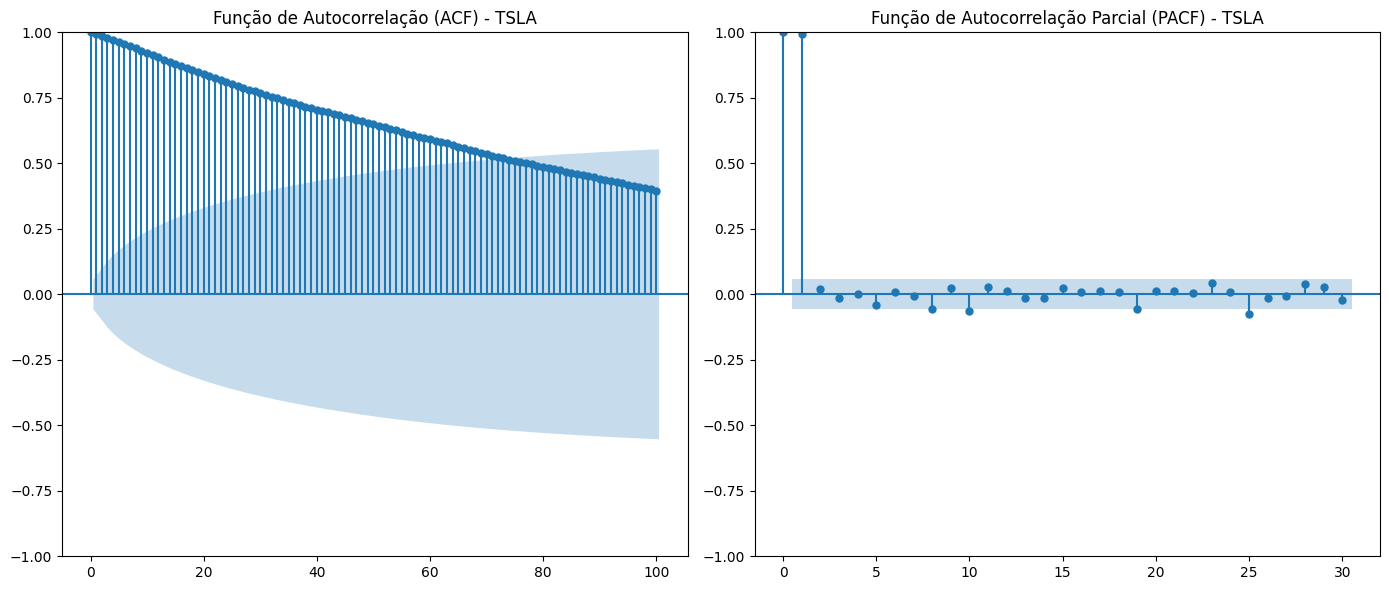

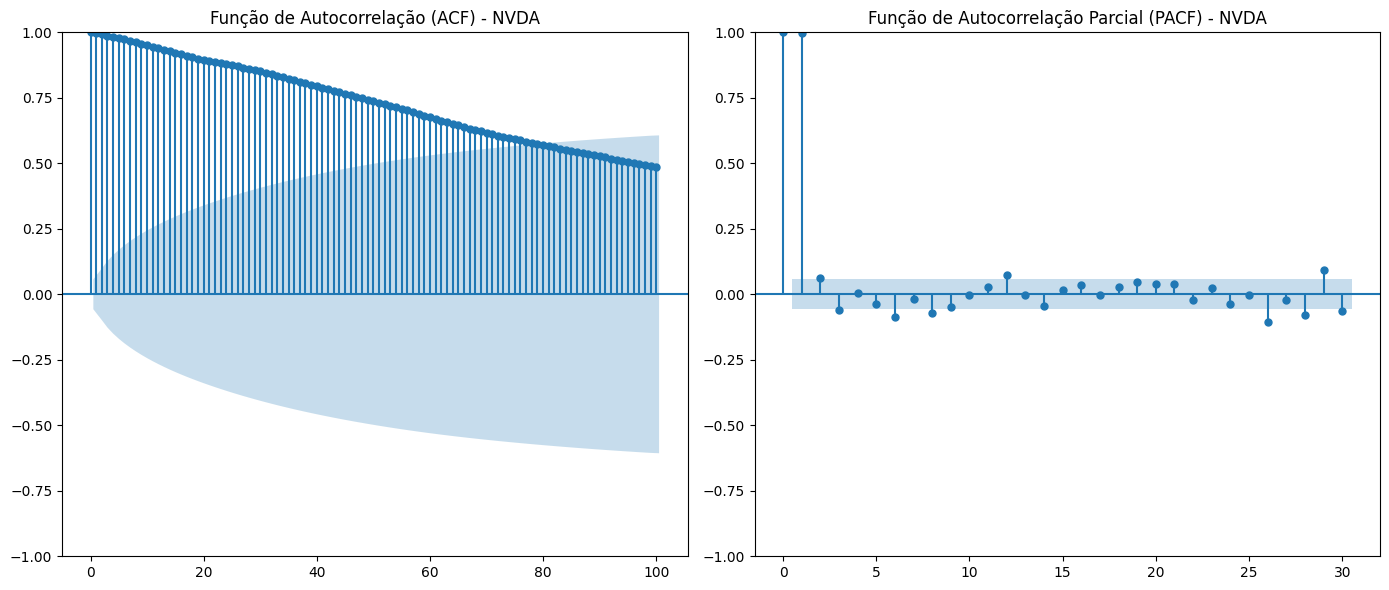

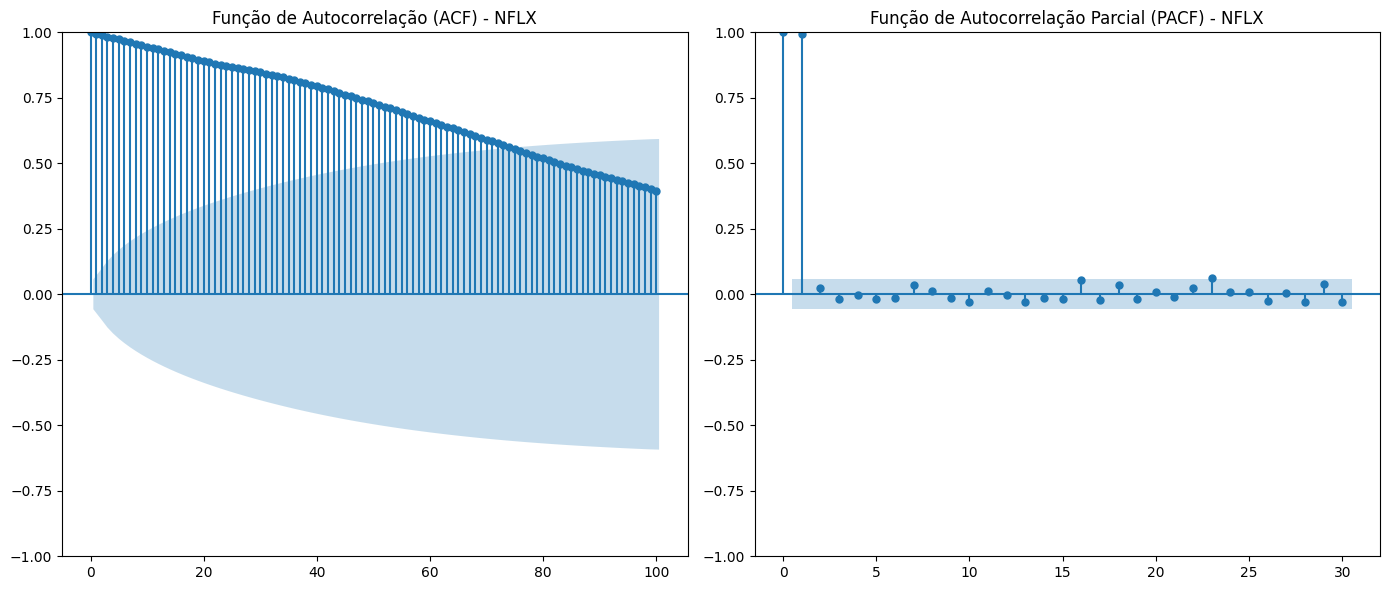

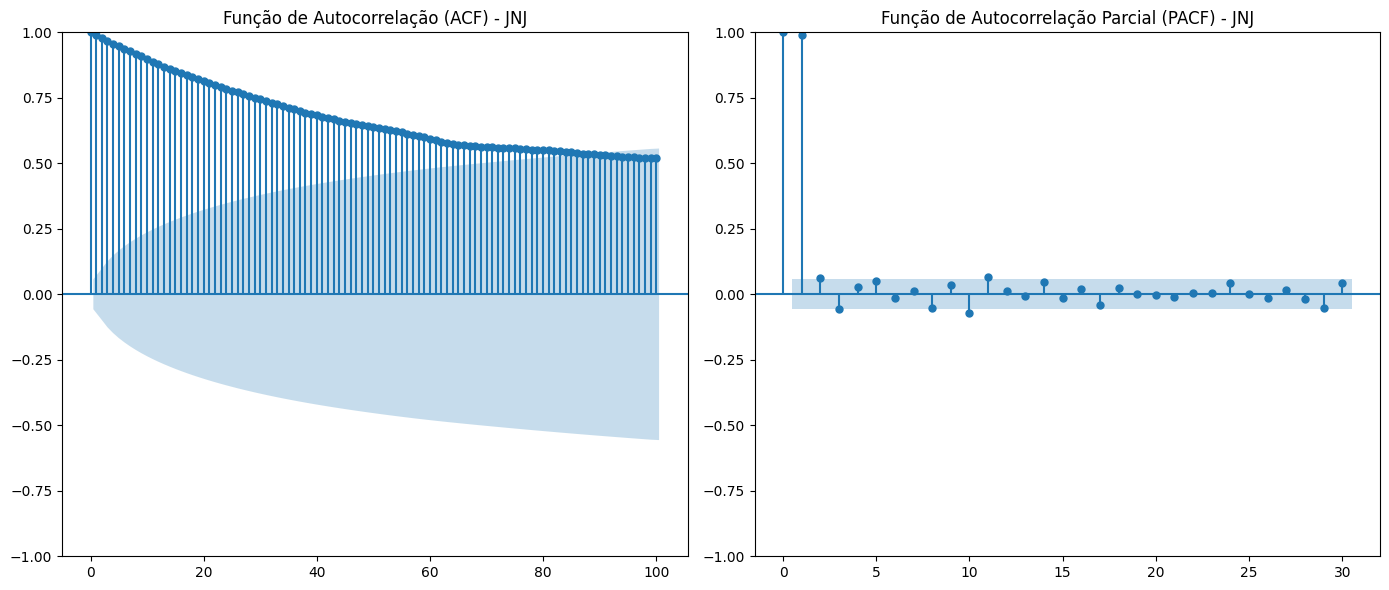

In [ ]:
# Plotando ACF e PACF para cada ação
for symbol in data_dict.keys():
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

    # Gráfico ACF
    plot_acf(data_dict[symbol], lags=100, ax=ax1)
    ax1.set_title(f'Função de Autocorrelação (ACF) - {symbol}')

    # Gráfico PACF
    plot_pacf(data_dict[symbol], lags=30, ax=ax2)
    ax2.set_title(f'Função de Autocorrelação Parcial (PACF) - {symbol}')

    plt.tight_layout()
    plt.show()

In [ ]:
# Criando DataFrames para armazenar dados reais e previsões
historical_data_df = pd.DataFrame()
forecast_data_df = pd.DataFrame()

# Previsões com Prophet

DEBUG:cmdstanpy:input tempfile: /tmp/tmpa1q2axd1/h4e5bhs3.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpa1q2axd1/z9wo4nwg.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=58271', 'data', 'file=/tmp/tmpa1q2axd1/h4e5bhs3.json', 'init=/tmp/tmpa1q2axd1/z9wo4nwg.json', 'output', 'file=/tmp/tmpa1q2axd1/prophet_model_hvx7g_h/prophet_model-20240913005423.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
00:54:23 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
00:54:23 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
/usr/local/lib/python3.10/dist-packages/prophet/plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray.

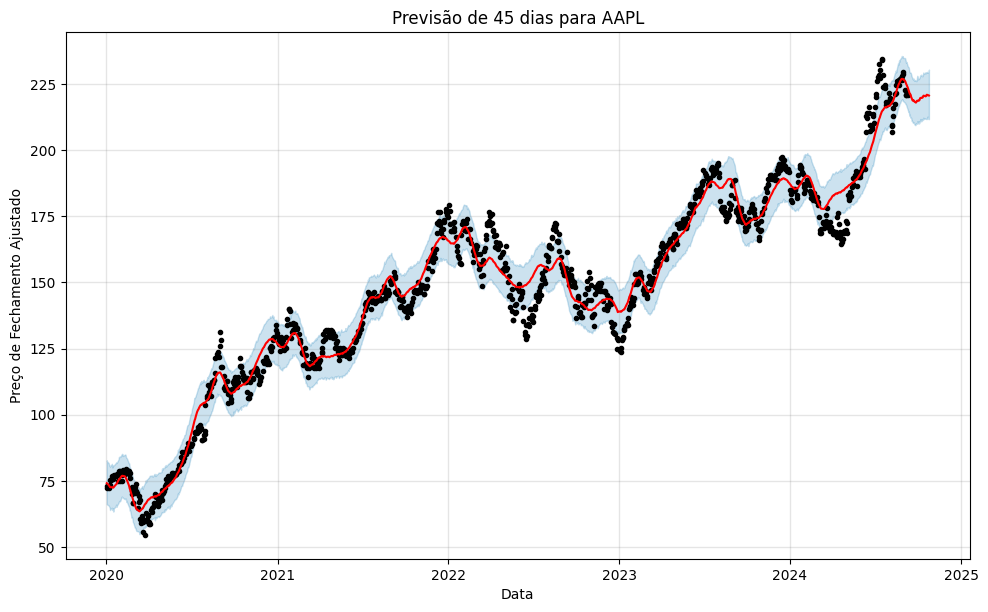

DEBUG:cmdstanpy:input tempfile: /tmp/tmpa1q2axd1/ejkc_a2i.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpa1q2axd1/q6ylkoej.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=15653', 'data', 'file=/tmp/tmpa1q2axd1/ejkc_a2i.json', 'init=/tmp/tmpa1q2axd1/q6ylkoej.json', 'output', 'file=/tmp/tmpa1q2axd1/prophet_model09qw4oxf/prophet_model-20240913005424.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
00:54:24 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
00:54:25 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
/usr/local/lib/python3.10/dist-packages/prophet/plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray.

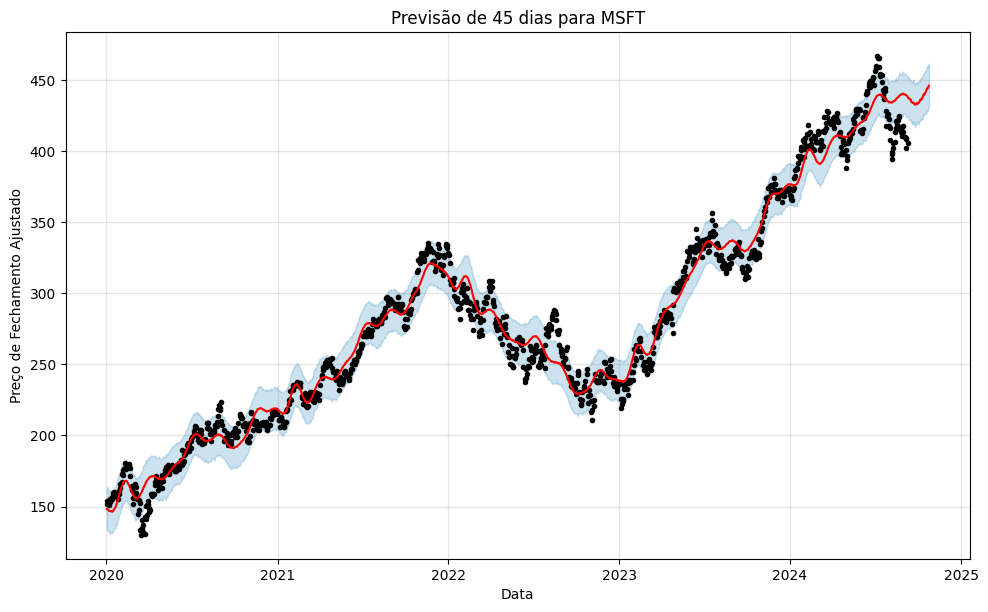

DEBUG:cmdstanpy:input tempfile: /tmp/tmpa1q2axd1/8vr_2ihz.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpa1q2axd1/xu6a4_5p.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=93252', 'data', 'file=/tmp/tmpa1q2axd1/8vr_2ihz.json', 'init=/tmp/tmpa1q2axd1/xu6a4_5p.json', 'output', 'file=/tmp/tmpa1q2axd1/prophet_model6ez7ki45/prophet_model-20240913005426.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
00:54:26 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
00:54:27 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
/usr/local/lib/python3.10/dist-packages/prophet/plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray.

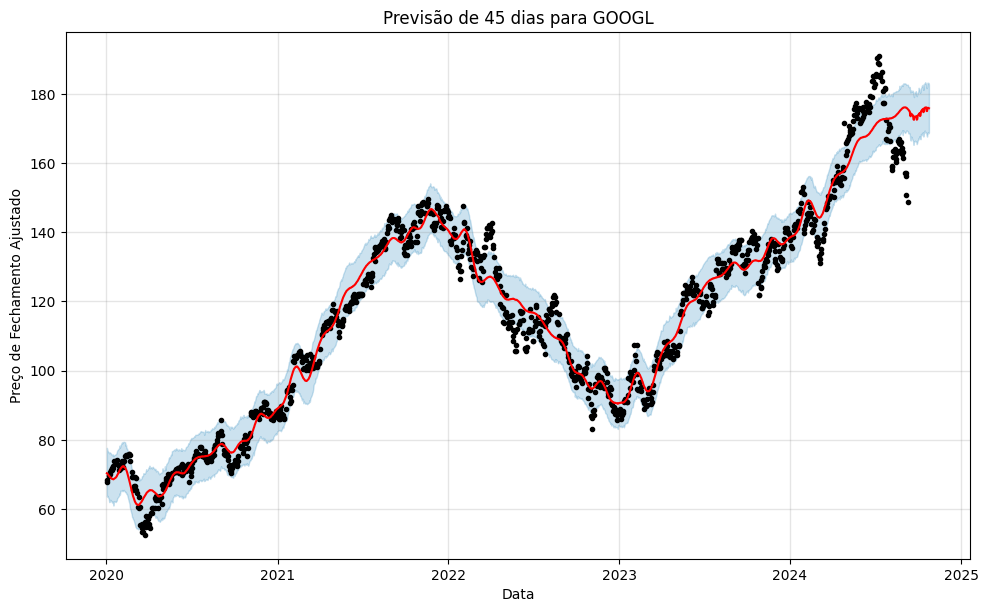

DEBUG:cmdstanpy:input tempfile: /tmp/tmpa1q2axd1/kfntjvcs.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpa1q2axd1/r689pcol.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=7059', 'data', 'file=/tmp/tmpa1q2axd1/kfntjvcs.json', 'init=/tmp/tmpa1q2axd1/r689pcol.json', 'output', 'file=/tmp/tmpa1q2axd1/prophet_modelrhqivqam/prophet_model-20240913005430.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
00:54:30 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
00:54:32 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
/usr/local/lib/python3.10/dist-packages/prophet/plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. 

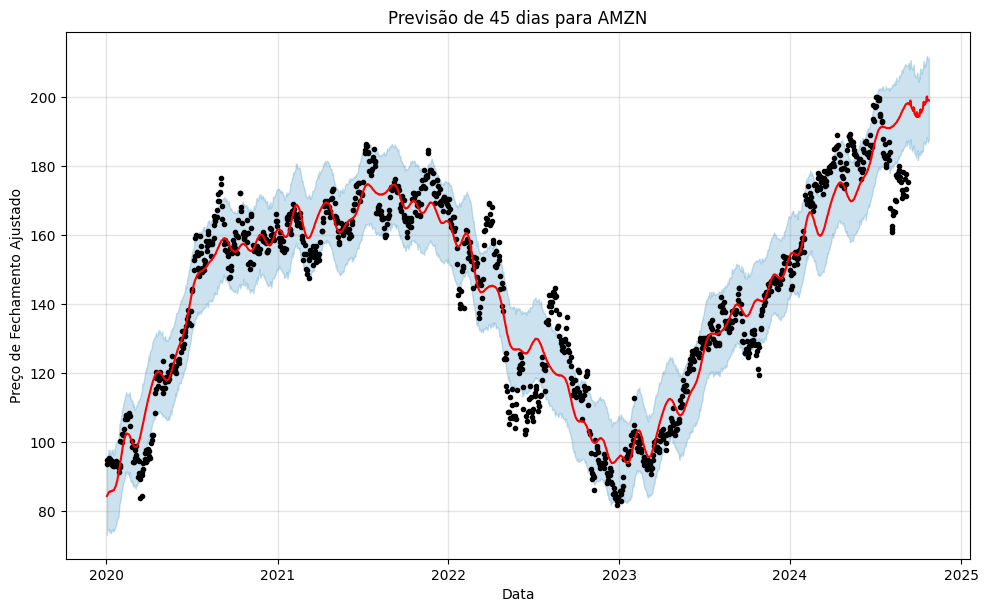

DEBUG:cmdstanpy:input tempfile: /tmp/tmpa1q2axd1/vhqswauh.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpa1q2axd1/ak5xlop_.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=66024', 'data', 'file=/tmp/tmpa1q2axd1/vhqswauh.json', 'init=/tmp/tmpa1q2axd1/ak5xlop_.json', 'output', 'file=/tmp/tmpa1q2axd1/prophet_modelh0y7fp1y/prophet_model-20240913005435.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
00:54:35 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
00:54:36 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
/usr/local/lib/python3.10/dist-packages/prophet/plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray.

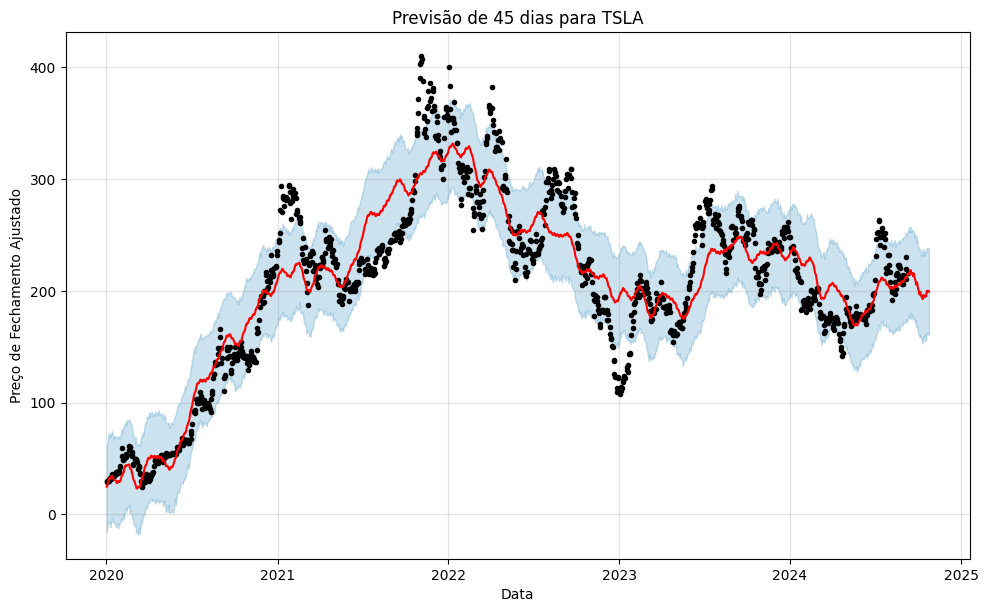

DEBUG:cmdstanpy:input tempfile: /tmp/tmpa1q2axd1/wcon75ks.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpa1q2axd1/gs2wuo0n.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=23643', 'data', 'file=/tmp/tmpa1q2axd1/wcon75ks.json', 'init=/tmp/tmpa1q2axd1/gs2wuo0n.json', 'output', 'file=/tmp/tmpa1q2axd1/prophet_modelql01jhvk/prophet_model-20240913005438.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
00:54:38 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
00:54:39 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
/usr/local/lib/python3.10/dist-packages/prophet/plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray.

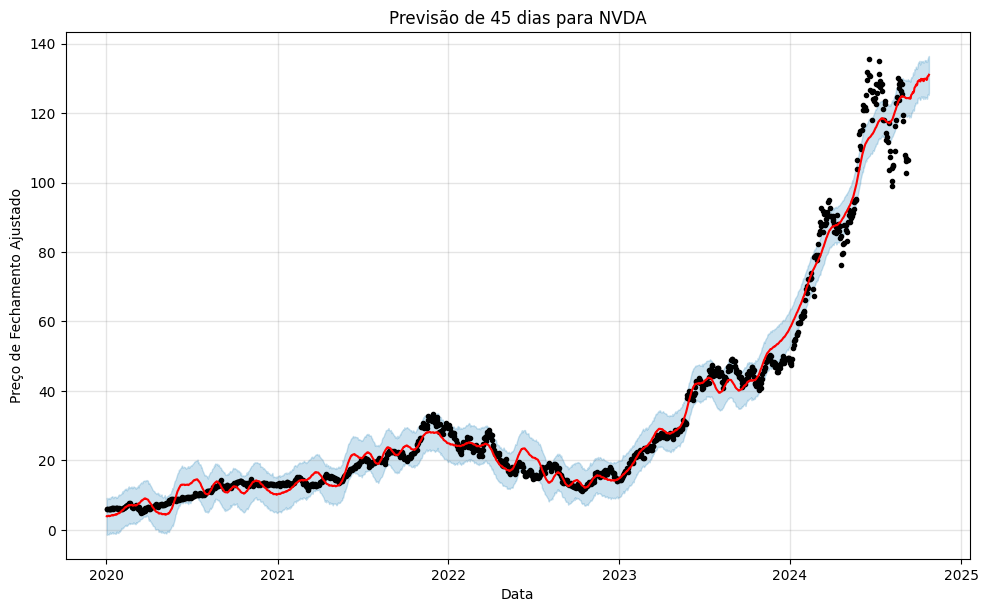

DEBUG:cmdstanpy:input tempfile: /tmp/tmpa1q2axd1/uvj0drtz.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpa1q2axd1/lc8viwdp.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=80141', 'data', 'file=/tmp/tmpa1q2axd1/uvj0drtz.json', 'init=/tmp/tmpa1q2axd1/lc8viwdp.json', 'output', 'file=/tmp/tmpa1q2axd1/prophet_modelaulx2i9b/prophet_model-20240913005440.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
00:54:40 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
00:54:41 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
/usr/local/lib/python3.10/dist-packages/prophet/plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray.

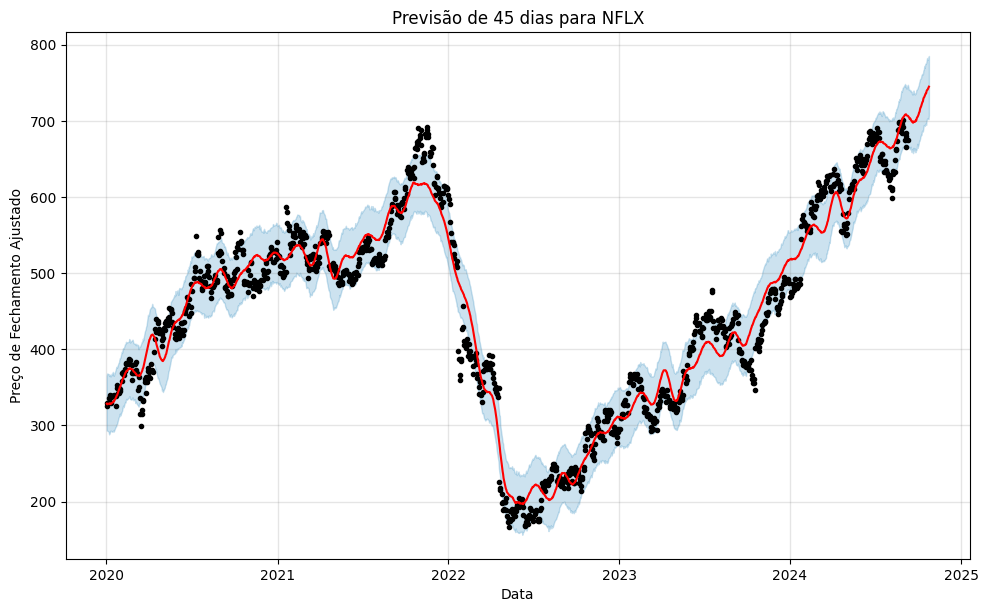

DEBUG:cmdstanpy:input tempfile: /tmp/tmpa1q2axd1/r59bt6w6.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpa1q2axd1/d19s6oh9.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=25792', 'data', 'file=/tmp/tmpa1q2axd1/r59bt6w6.json', 'init=/tmp/tmpa1q2axd1/d19s6oh9.json', 'output', 'file=/tmp/tmpa1q2axd1/prophet_modelokohli6a/prophet_model-20240913005442.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
00:54:42 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
00:54:42 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
/usr/local/lib/python3.10/dist-packages/prophet/plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray.

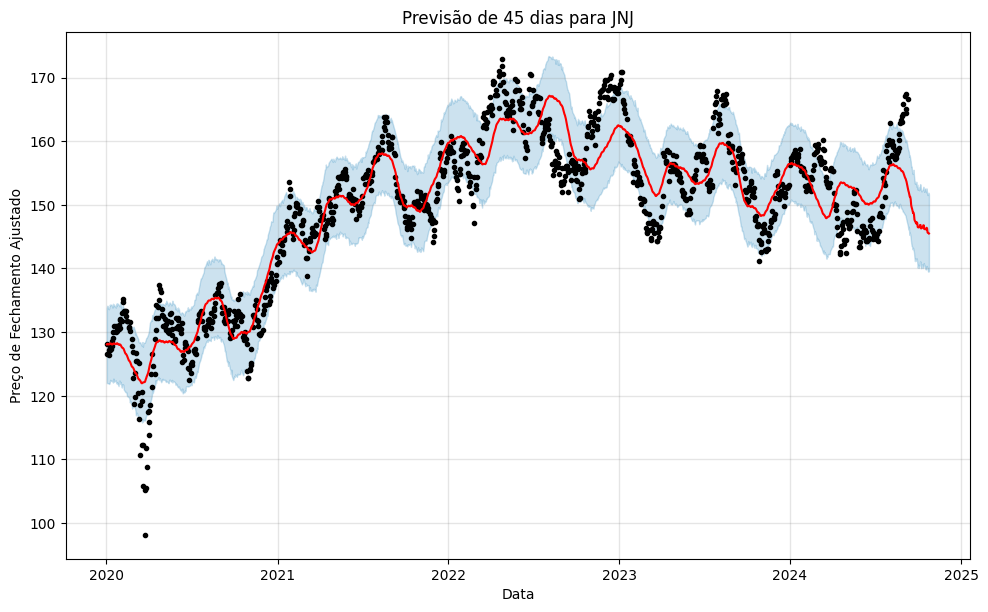

In [ ]:
for symbol, data in data_dict.items():

    df_prophet = data.reset_index()
    df_prophet.columns = ['ds', 'y']  # Prophet requer que as colunas sejam renomeadas para 'ds' (data) e 'y' (valor)

    # Adicionar dados reais ao DataFrame histórico
    df_temp = pd.DataFrame(data).reset_index()
    df_temp.columns = ['Date', symbol]
    if historical_data_df.empty:
        historical_data_df = df_temp
    else:
        historical_data_df = pd.merge(historical_data_df, df_temp, on='Date', how='outer')

    # Criando e ajustando o modelo Prophet
    model = Prophet(daily_seasonality=True, yearly_seasonality=True)
    model.fit(df_prophet)

    # Criando um DataFrame para n-dias_previsao à frente
    future = model.make_future_dataframe(periods=dias_previsao)  # futuros para previsão
    forecast = model.predict(future)

    # Plotando a previsão
    fig1 = model.plot(forecast)
    ax = fig1.gca()  # Obter o eixo atual para personalização
    ax.lines[1].set_color('red')  # Altera a cor da linha de previsão para vermelho
    plt.title(f'Previsão de {dias_previsao} dias para {symbol}')
    plt.xlabel('Data')
    plt.ylabel('Preço de Fechamento Ajustado')
    plt.show()

    # Adicionando dados de previsão ao DataFrame de previsões
    forecast_temp = forecast[['ds', 'yhat']].copy()
    forecast_temp.columns = ['Date', symbol]
    if forecast_data_df.empty:
        forecast_data_df = forecast_temp
    else:
        forecast_data_df = pd.merge(forecast_data_df, forecast_temp, on='Date', how='outer')

In [ ]:
# Exportando os dados históricos para CSV
historical_data_df.to_csv('dados_reais_acoes.csv', index=True)
print('Dados reais exportados para "dados_reais_acoes.csv".')

# Exportando os dados de previsão para CSV
forecast_data_df.to_csv('previsoes_acoes.csv', index=True)
print('Previsões exportadas para "previsoes_acoes.csv".')

Dados reais exportados para "dados_reais_acoes.csv".
Previsões exportadas para "previsoes_acoes.csv".
